<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [11]:
## Write your code here

print(df["Employment"].isnull().sum())
print(df["JobSat"].isnull().sum())
print(df["RemoteWork"].isnull().sum())

print("---")
mf_Jobsat_mean = df["JobSat"].mean()
mf_RemoteWork_mode = df["RemoteWork"].mode()[0]

df["JobSat"] = df["JobSat"].fillna(mf_Jobsat_mean)
df["RemoteWork"] = df["RemoteWork"].fillna(mf_RemoteWork_mode)
print(df["JobSat"].isnull().sum())
print(df["RemoteWork"].isnull().sum())

0
36311
10631
---
0
0


In [15]:
df["JobSat"].head(20)

0      6.935041
1      6.935041
2      6.935041
3      6.935041
4      6.935041
5      6.935041
6      6.935041
7      6.935041
8      6.935041
9      6.935041
10     8.000000
11     6.935041
12     8.000000
13     6.935041
14     6.935041
15     5.000000
16     6.935041
17     6.935041
18    10.000000
19     6.935041
Name: JobSat, dtype: float64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


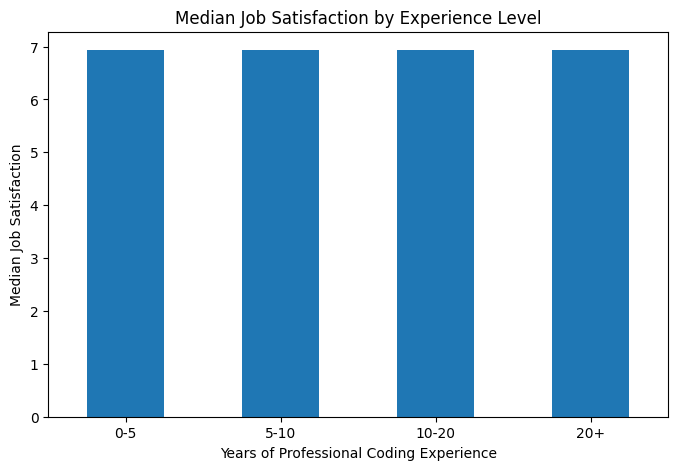

In [13]:
## Write your code here

df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")     #errors="coerce" turns non-numbers into NaN
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce")

bins = [0, 5, 10, 20, 100]                    #Create Experience Ranges
labels = ["0-5", "5-10", "10-20", "20+"]

df["ExperienceGroup"] = pd.cut(df["YearsCodePro"], bins=bins, labels=labels)

median_satisfaction = df.groupby("ExperienceGroup")["JobSat"].median()  # Calculate median satisfaction

#barplot
plt.figure(figsize=(8,5))
median_satisfaction.plot(kind="bar")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Median Job Satisfaction")
plt.title("Median Job Satisfaction by Experience Level")
plt.xticks(rotation=0)
plt.show()


The bar chart looks like this because we dealed with a lot of NaN values in the JobSat Column. The vast majority of the values is now ~6,9, thats why the chart looks like this.

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


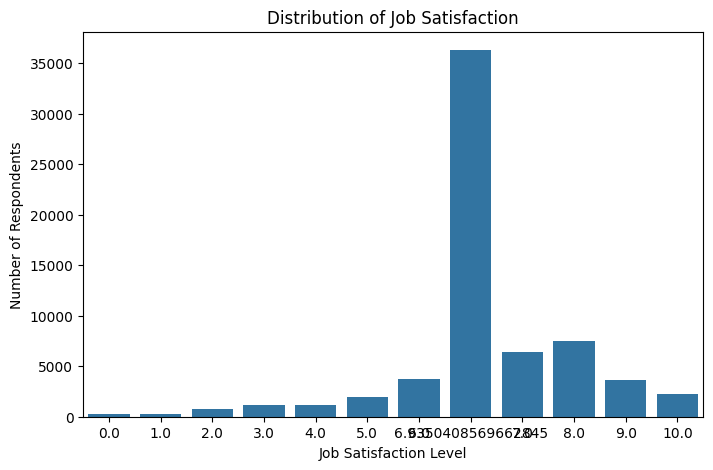

In [17]:
## Write your code here

plt.figure(figsize=(8,5))

sns.countplot(x="JobSat", data=df)

plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Job Satisfaction")

plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


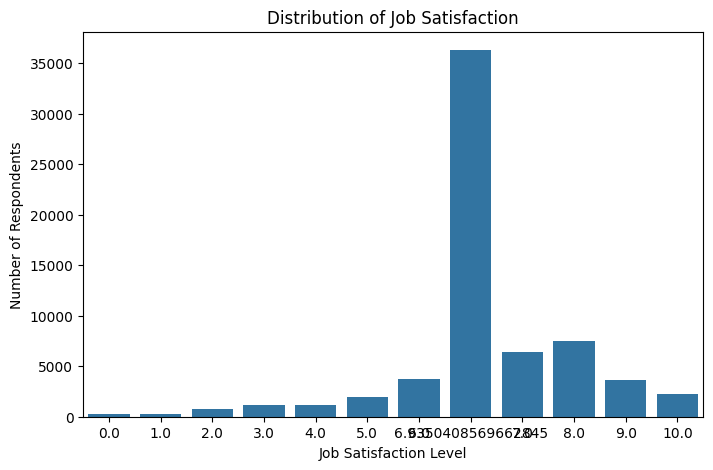

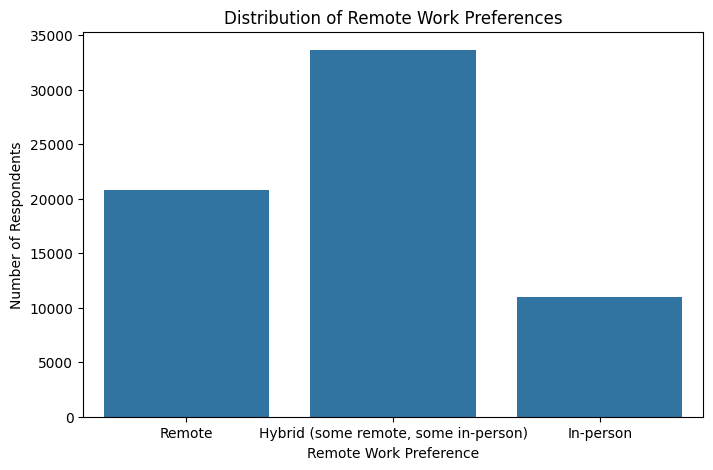

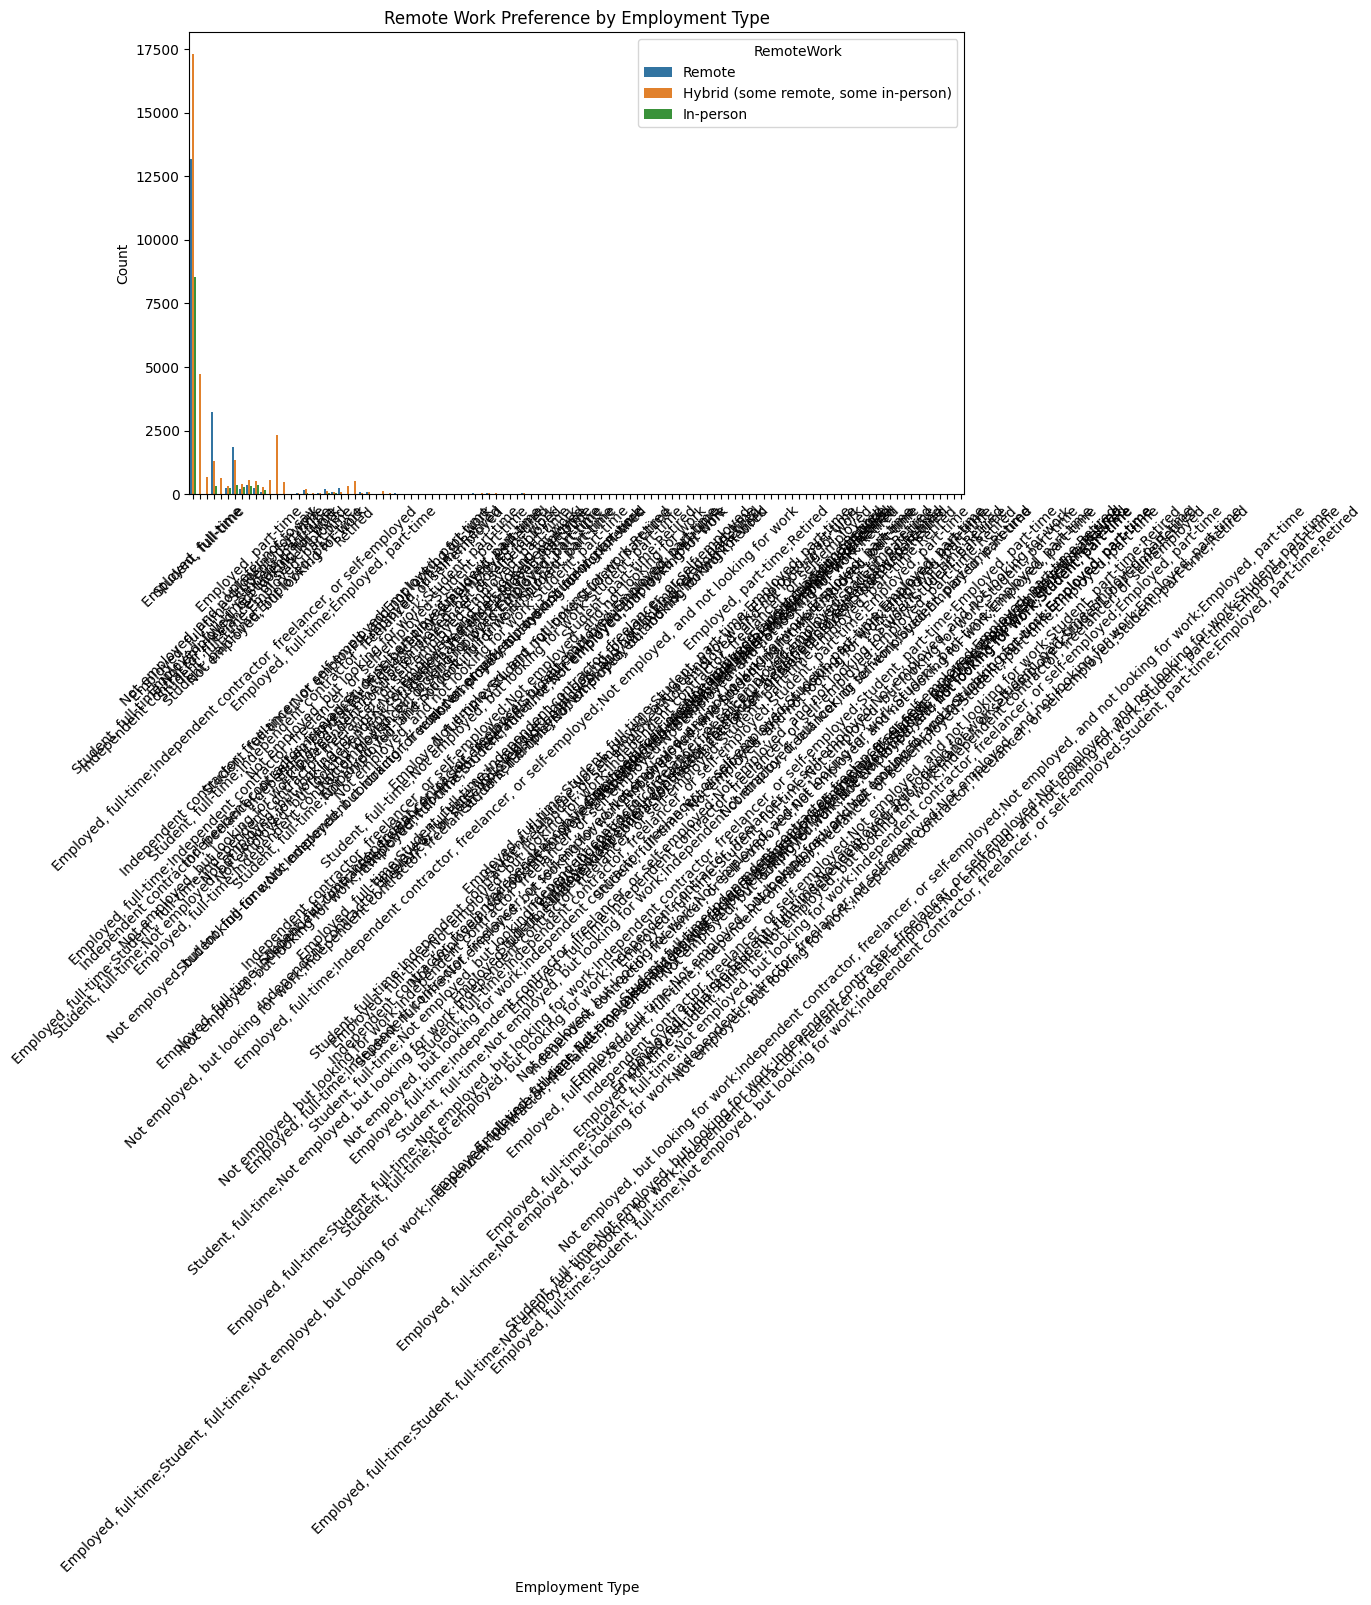

In [20]:
## Write your code here

plt.figure(figsize=(8,5))

sns.countplot(x="JobSat", data=df)

plt.xlabel("Job Satisfaction Level")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Job Satisfaction")

plt.figure(figsize=(8,5))

sns.countplot(x="RemoteWork", data=df)

plt.title("Distribution of Remote Work Preferences")
plt.xlabel("Remote Work Preference")
plt.ylabel("Number of Respondents")

#Comparison
plt.figure(figsize=(10,6))

sns.countplot(x="Employment", hue="RemoteWork", data=df)

plt.title("Remote Work Preference by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


0                                                  NaN
1    Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                   C#
3    C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4              C++;HTML/CSS;JavaScript;Lua;Python;Rust
Name: LanguageHaveWorkedWith, dtype: str
----


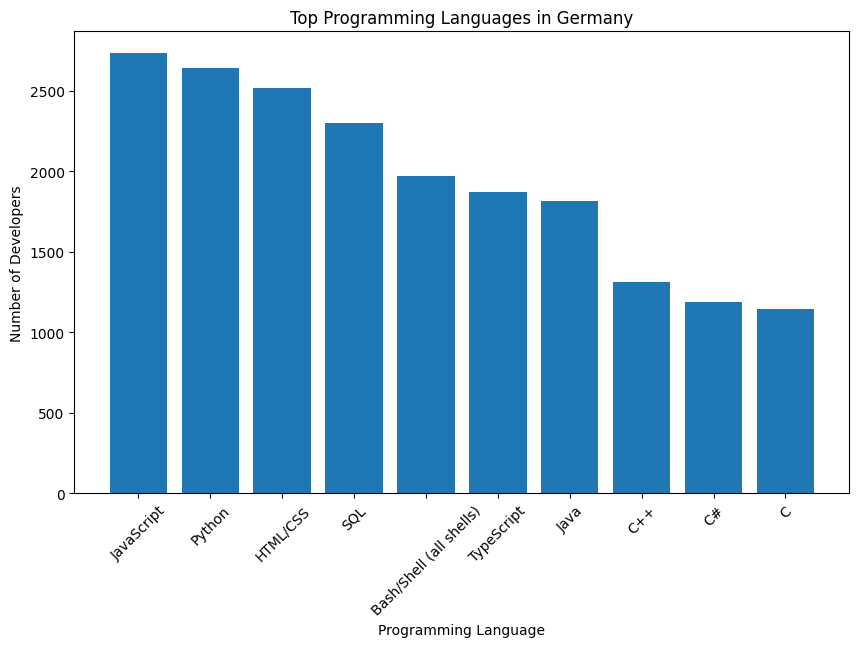

In [28]:
## Write your code here

print(df["LanguageHaveWorkedWith"].head(5))
print("----")

country_data = df[df["Country"] == "Germany"]  #Filtering by country

languages = country_data["LanguageHaveWorkedWith"].dropna().str.split(";") #split and exploding language
languages = languages.explode()

top_languages = languages.value_counts().head(10)  #Counting top languages


plt.figure(figsize=(10,6))
plt.bar(top_languages.keys(), top_languages.values)

plt.xticks(rotation=45)
plt.xlabel("Programming Language")
plt.ylabel("Number of Developers")
plt.title("Top Programming Languages in Germany")

plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


0     6.935041
1    17.000000
2    27.000000
3     6.935041
4     6.935041
Name: YearsCodePro, dtype: float64
0    18.581094
1     0.000000
2    18.581094
3    18.581094
4    18.581094
Name: JobSatPoints_1, dtype: float64
-------------
0
0
-------------------


<function matplotlib.pyplot.show(close=None, block=None)>

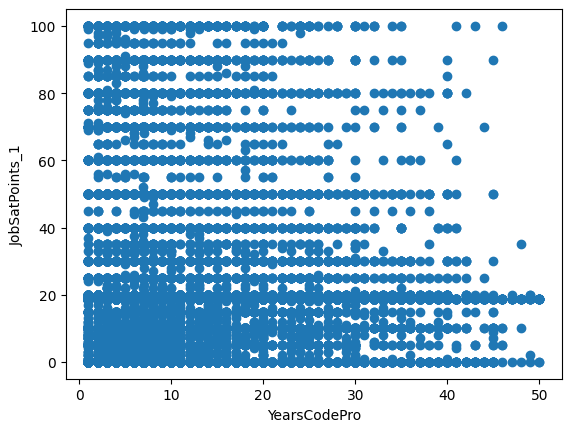

In [38]:
## Write your code here

print(df["YearsCodePro"].head(5))
print(df["JobSatPoints_1"].head(5))

print("-------------")
mf_YearsCodePro_mean = df["JobSat"].mean()
mf_JobSatPoints_mode = df["JobSatPoints_1"].mean()

df["YearsCodePro"] = df["YearsCodePro"].fillna(mf_YearsCodePro_mean)
df["JobSatPoints_1"] = df["JobSatPoints_1"].fillna(mf_JobSatPoints_mode)
print(df["YearsCodePro"].isnull().sum())
print(df["JobSatPoints_1"].isnull().sum())
print("-------------------")

plt.scatter(x = df["YearsCodePro"],y = df["JobSatPoints_1"])
plt.xlabel("YearsCodePro")
plt.ylabel("JobSatPoints_1")
plt.show

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [41]:
## Write your code here

#print(df["EdLevel"].head(5))
#print(df["Employment"].head(5))


EE_V = pd.crosstab(df['EdLevel'], df['Employment'])

print(EE_V)


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [42]:
## Write your code here

df.to_csv("df_clean.csv", index=False)



<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
